## Analysis of the Reference RSSI, Path Loss Exponent and Noise Distribution

### Install dependencies

In [18]:
%pip install numpy
%pip install scipy
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Function to read data from the text file

In [19]:
def read_file(file_path):
    data = []

    try:
        with open(file_path, 'r') as file:
            for line in file:
                try:
                    rssi_value = int(line.strip())
                    data.append(rssi_value)
                except ValueError:
                      pass
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

    return data

### Plot of noise

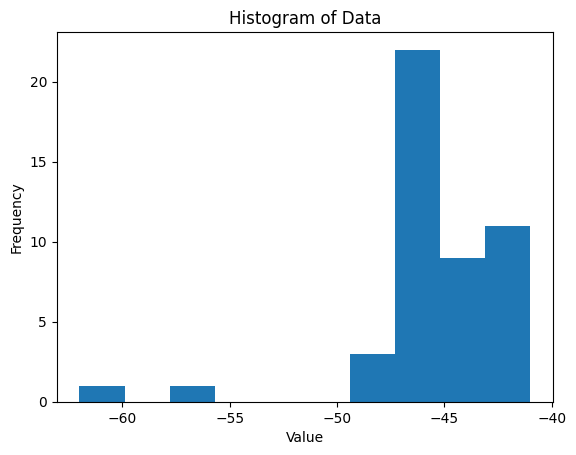

In [20]:
import matplotlib.pyplot as plt

data = read_file(f"dist_3_steps.txt")

plt.hist(data)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Data")
plt.show()

### Analyze Noise for different length of median filter

In [21]:
import numpy as np
from scipy.signal import medfilt

for n in [3, 6, 12]:
    data = read_file(f"dist_{n}_steps.txt")
    mean_data = np.mean(data)
    median_data = np.median(data)
    std_data = np.std(data)

    print(f"Mean at {n} steps: {mean_data:.2f}")
    print(f"Median at {n} steps: {median_data:.2f}")
    print(f"Std at {n} steps: {std_data:.2f}")

    for length in [3, 5, 7, 9]:
        filtered_data = medfilt(np.array(data), kernel_size=length)
        current_std_dev = np.std(filtered_data)
        print(f"  Median filter length: {length}, Standard deviation: {current_std_dev:.4f}")

Mean at 3 steps: -45.55
Median at 3 steps: -46.00
Std at 3 steps: 3.57
  Median filter length: 3, Standard deviation: 1.9236
  Median filter length: 5, Standard deviation: 1.9130
  Median filter length: 7, Standard deviation: 1.8367
  Median filter length: 9, Standard deviation: 1.7561
Mean at 6 steps: -60.27
Median at 6 steps: -57.00
Std at 6 steps: 6.45
  Median filter length: 3, Standard deviation: 4.1068
  Median filter length: 5, Standard deviation: 2.6798
  Median filter length: 7, Standard deviation: 1.4330
  Median filter length: 9, Standard deviation: 1.3771
Mean at 12 steps: -73.16
Median at 12 steps: -73.00
Std at 12 steps: 4.01
  Median filter length: 3, Standard deviation: 1.9360
  Median filter length: 5, Standard deviation: 1.6503
  Median filter length: 7, Standard deviation: 1.5157
  Median filter length: 9, Standard deviation: 1.3790


### Calculation of Path Loss Exponent

In [22]:
median_3_steps = -46.00
median_6_steps = -57.00
median_12_steps = -73.00

path_loss = (abs(median_3_steps - median_6_steps) + abs(median_6_steps - median_12_steps))/2
path_loss_exponent = path_loss / 10 / np.log10(2)
print(f"Estimated Path Loss Exponent: {path_loss_exponent:.4f}")

Estimated Path Loss Exponent: 4.4846


### Calculation of Reference RSSI (at 1 metre)

In [23]:
# 3.5 steps = 1 metre

median_3_steps = -46.00
extra_path_loss = -4 * 10 * np.log10(3.5/3.0)
reference_rssi = median_3_steps + extra_path_loss
print(f"Estimated Reference RSSI at 1 metre: {reference_rssi:.2f} dBm")

Estimated Reference RSSI at 1 metre: -48.68 dBm


### Final Analysis

- The path loss exponent is very close to 4. This is expected as it should follow the 2-ray ground reflection path loss model.
- The Reference RSSI is -48.
- The amount of noise after median filter is less than 2 standard deviations. (Useful for simulating noise in the simulator).